In [355]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Classification

## Adult dataset

Predicting whether the salary is above or below 50k per year

In [356]:
df = pd.read_csv('Adult.csv', index_col=0)

In [357]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
Salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [359]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [360]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
Salary                2
dtype: int64

## Data Visualization and Analysis 

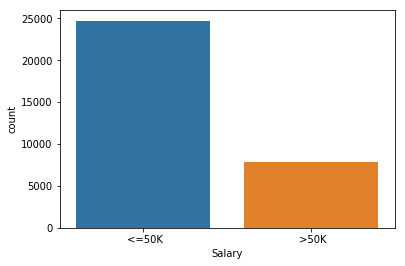

In [361]:
sns.countplot(df['Salary'])

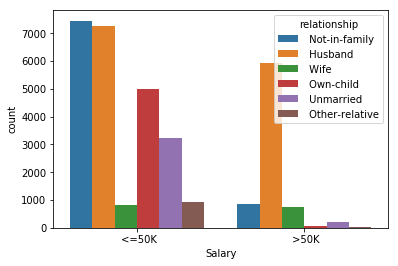

In [362]:
sns.countplot(df['Salary'], hue = df['relationship'])

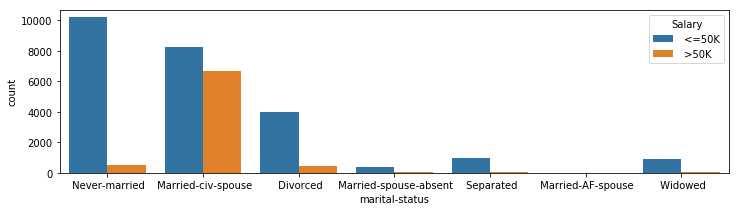

In [363]:
plt.figure(figsize=(12,3))
sns.countplot(df['marital-status'], hue = df['Salary'])

In [364]:
df.groupby(['capital-gain'])['capital-gain'].count().head()

capital-gain
0      29849
114        6
401        2
594       34
914        8
Name: capital-gain, dtype: int64

In [365]:
df.groupby(['capital-loss'])['capital-loss'].count().head()

capital-loss
0      31042
155        1
213        4
323        3
419        3
Name: capital-loss, dtype: int64

In [366]:
df.groupby(['native-country'])['native-country'].count().head()

native-country
 ?           583
 Cambodia     19
 Canada      121
 China        75
 Columbia     59
Name: native-country, dtype: int64

In [367]:
df.groupby(['education'])['education-num'].mean()

education
 10th             6
 11th             7
 12th             8
 1st-4th          2
 5th-6th          3
 7th-8th          4
 9th              5
 Assoc-acdm      12
 Assoc-voc       11
 Bachelors       13
 Doctorate       16
 HS-grad          9
 Masters         14
 Preschool        1
 Prof-school     15
 Some-college    10
Name: education-num, dtype: int64

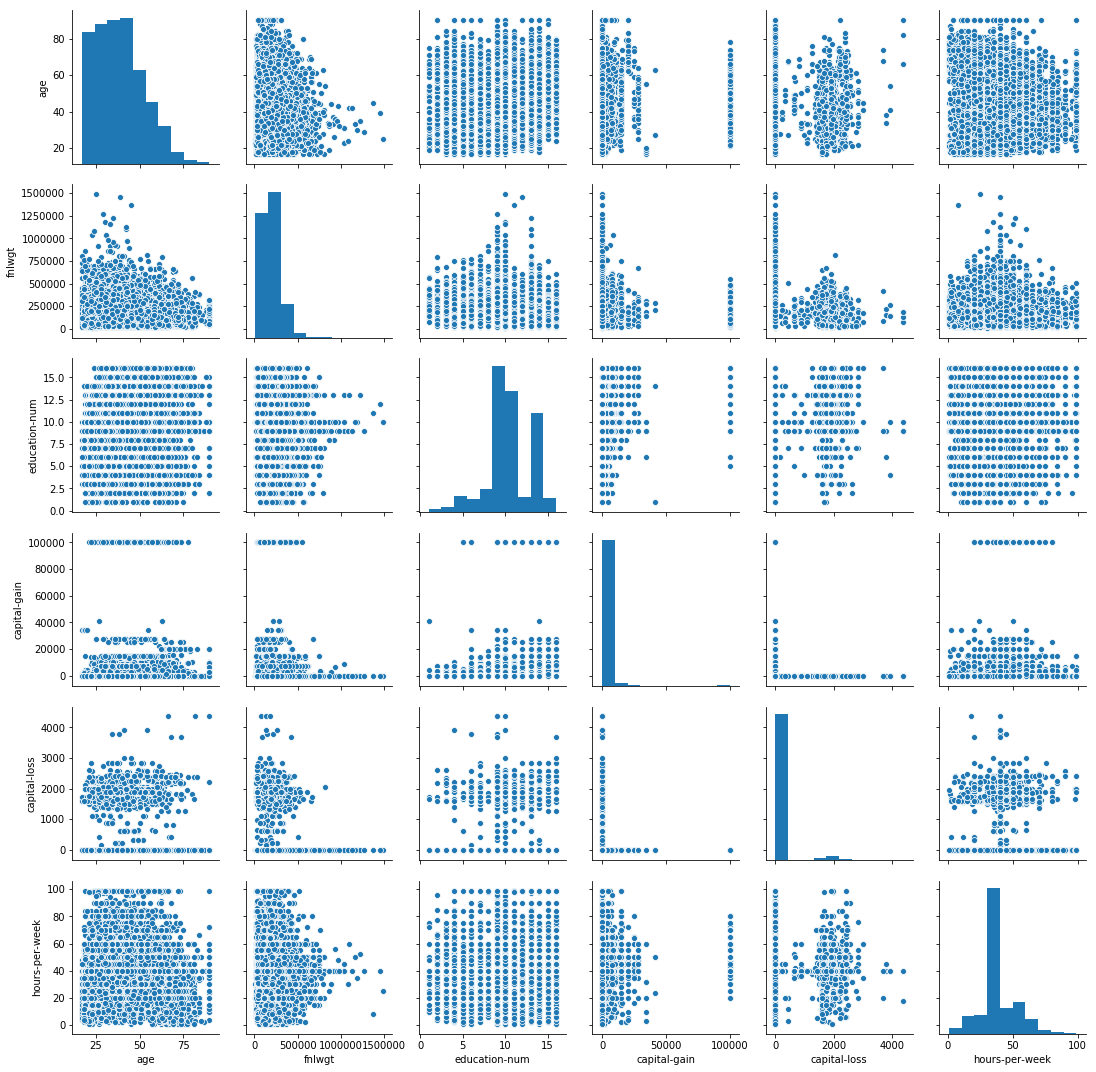

In [368]:
sns.pairplot(df)

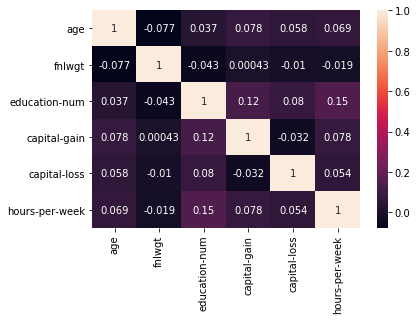

In [369]:
sns.heatmap(df.corr(), annot = True)

In [370]:
df = df.drop(labels = ['education', 'relationship'], axis=1)

In [371]:
category_col_sal = {"Salary": {" <=50K": 0, " >50K": 1}}
df.replace(category_col_sal, inplace=True)
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,0


In [372]:
# df = df[(df[['native-country']] != " ?").all(axis=1)]
# df.head()

In [373]:
df.groupby(['native-country'])['native-country'].count().head()

native-country
 ?           583
 Cambodia     19
 Canada      121
 China        75
 Columbia     59
Name: native-country, dtype: int64

In [374]:
def usa_other(x):
    if x != " United-States":
        x = "Other"
    return x

In [375]:
df['native-country'] = df['native-country'].apply(usa_other)

In [376]:
df.groupby(['native-country'])['native-country'].count().head()

native-country
 United-States    29170
Other              3391
Name: native-country, dtype: int64

## Logistic Regression, KNN and Random Forrest 

Try these 3 models and compare the scores

In [377]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report

In [378]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [379]:
category_cols = ['workclass', 'marital-status', 'occupation', 'race', 'sex', 'native-country']

In [380]:
X = pd.get_dummies(X, columns=category_cols, drop_first=True)

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [382]:
train_mean = X_train.mean()
train_std = X_train.std()
X_train = (X_train - train_mean)/train_std
X_test = (X_test - train_mean)/train_std

In [383]:
models = {'Logistic_Regression': LogisticRegression(class_weight='balanced'),
          'KNN': KNeighborsClassifier(n_neighbors=5),
          'Random_Forest': RandomForestClassifier()}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    #print(model_name, f1_score(y_test, predict))
    print(model_name)
    print(classification_report(y_test, predict))
    print("====================\n")

Logistic_Regression
             precision    recall  f1-score   support

          0       0.94      0.79      0.86      2500
          1       0.55      0.83      0.66       757

avg / total       0.85      0.80      0.82      3257


KNN
             precision    recall  f1-score   support

          0       0.89      0.91      0.90      2500
          1       0.66      0.61      0.64       757

avg / total       0.83      0.84      0.84      3257


Random_Forest
             precision    recall  f1-score   support

          0       0.88      0.93      0.91      2500
          1       0.72      0.58      0.65       757

avg / total       0.84      0.85      0.85      3257




## GridSearch

Out of those 3 models choose one to perform GridSearch on it's hyper-parameters

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [319]:
n_estimators = [int(x) for x in np.linspace(start=190, stop=220, num=5)]
max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(3, 50, num=3)]
# max_depth.append(None)
max_depth = [None]
min_samples_split = [15, 17]
min_samples_leaf = [1, 3]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [320]:
from sklearn.model_selection import GridSearchCV

In [321]:
gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, scoring='f1',
            cv=2, verbose=1)

In [322]:
gs_rf.fit(X_train, y_train)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  7.8min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [190, 197, 205, 212, 220], 'max_features': ['auto', 'sqrt'], 'max_depth': [None], 'min_samples_split': [15, 17], 'min_samples_leaf': [1, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [323]:
test_predictions = gs_rf.predict(X_test)
train_predictions = gs_rf.predict(X_train)
print("TRAIN:")
print(classification_report(y_train, train_predictions))
print("TEST:")
print(classification_report(y_test, test_predictions))

TRAIN:
             precision    recall  f1-score   support

          0       0.93      0.97      0.95     21037
          1       0.90      0.76      0.82      6639

avg / total       0.92      0.92      0.92     27676

TEST:
             precision    recall  f1-score   support

          0       0.89      0.94      0.92      3683
          1       0.79      0.64      0.71      1202

avg / total       0.86      0.87      0.86      4885



In [324]:
gs_rf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 190}

# Well Done! Go to the next file.